In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/LearnAboutTfrecord/First/kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d sshikamaru/fruit-recognition

Dataset URL: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition
License(s): other
 92% 94.0M/102M [00:00<00:00, 161MB/s]
100% 102M/102M [00:00<00:00, 157MB/s] 


In [11]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 218M/218M [00:01<00:00, 171MB/s]
100% 218M/218M [00:01<00:00, 184MB/s]


In [5]:
!unzip /content/fruit-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Pepper Green/Pepper Green_264.jpg  
  inflating: train/train/Pepper Green/Pepper Green_265.jpg  
  inflating: train/train/Pepper Green/Pepper Green_266.jpg  
  inflating: train/train/Pepper Green/Pepper Green_267.jpg  
  inflating: train/train/Pepper Green/Pepper Green_268.jpg  
  inflating: train/train/Pepper Green/Pepper Green_269.jpg  
  inflating: train/train/Pepper Green/Pepper Green_27.jpg  
  inflating: train/train/Pepper Green/Pepper Green_270.jpg  
  inflating: train/train/Pepper Green/Pepper Green_271.jpg  
  inflating: train/train/Pepper Green/Pepper Green_272.jpg  
  inflating: train/train/Pepper Green/Pepper Green_273.jpg  
  inflating: train/train/Pepper Green/Pepper Green_274.jpg  
  inflating: train/train/Pepper Green/Pepper Green_275.jpg  
  inflating: train/train/Pepper Green/Pepper Green_276.jpg  
  inflating: train/train/Pepper Green/Pepper Green_277.jpg  
  inflating: train/train/Pepper Gre

In [12]:
!unzip /content/cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [6]:
import os
import glob


In [9]:
len(os.listdir("/content/train/train"))

33

In [29]:
import os
import cv2
import numpy as np

# Paths
dataset_path = "/content/test_set/test_set"

# Initialize lists
images = []
labels = []

# Process images
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)

    # Ensure it's a directory
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Read image
            read_image = cv2.imread(file_path)

            # Resize image to a consistent shape, e.g., (128, 128)
            resized_image = cv2.resize(read_image, (128, 128))

            # Assign labels based on filename
            if "dog" in file_name.lower():
                images.append(resized_image)
                labels.append(0)
            elif "cat" in file_name.lower():
                images.append(resized_image)
                labels.append(1)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Number of images: {len(images)}")
print(f"Shape of images array: {images.shape}")
print(f"Labels: {np.unique(labels, return_counts=True)}")


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2025,) + inhomogeneous part.

In [30]:
import os
import tensorflow as tf
import cv2

# Paths
train_dataset_dir = "/content/training_set"
test_dataset_dir= "/content/test_set"
train_dir = os.path.join(train_dataset_dir, "training_set")
test_dir = os.path.join(test_dataset_dir, "test_set")

In [31]:
output_dir = "/content/tfrecords"  # Update this with the output directory
os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

train_tfrecord_path = os.path.join(output_dir, "train.tfrecord")
test_tfrecord_path = os.path.join(output_dir, "test.tfrecord")


In [33]:


# Function to create TFRecord features
def _bytes_feature(value):
    """Returns a bytes_list from a string/byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from an int."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

# Function to process and write images and labels into TFRecord
def write_tfrecord(data_dir, output_path, label_map, image_size=(128, 128)):
    with tf.io.TFRecordWriter(output_path) as writer:
        for label_name, label_value in label_map.items():
            folder_path = os.path.join(data_dir, label_name)
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                # Read and resize the image
                image = cv2.imread(image_path)
                if image is None:
                    continue  # Skip unreadable files
                image = cv2.resize(image, image_size)
                image_bytes = tf.io.encode_jpeg(image).numpy()

                # Create a feature dictionary
                feature = {
                    "image": _bytes_feature(image_bytes),
                    "label": _int64_feature(label_value)
                }

                # Create an Example
                example = tf.train.Example(features=tf.train.Features(feature=feature))

                # Serialize and write to file
                writer.write(example.SerializeToString())
    print(f"TFRecord saved to: {output_path}")

# Label mapping
label_map = {"cats": 1, "dogs": 0}

# Write train and test TFRecords
write_tfrecord(train_dir, train_tfrecord_path, label_map)
write_tfrecord(test_dir, test_tfrecord_path, label_map)


TFRecord saved to: /content/tfrecords/train.tfrecord
TFRecord saved to: /content/tfrecords/test.tfrecord


In [34]:
options = tf.io.TFRecordOptions(compression_type="GZIP")

def write_tfrecord(data_dir, output_path, label_map, image_size=(128, 128),options=None):
    with tf.io.TFRecordWriter(output_path,options=options) as writer:
        for label_name, label_value in label_map.items():
            folder_path = os.path.join(data_dir, label_name)
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                # Read and resize the image
                image = cv2.imread(image_path)
                if image is None:
                    continue  # Skip unreadable files
                image = cv2.resize(image, image_size)
                image_bytes = tf.io.encode_jpeg(image).numpy()

                # Create a feature dictionary
                feature = {
                    "image": _bytes_feature(image_bytes),
                    "label": _int64_feature(label_value)
                }

                # Create an Example
                example = tf.train.Example(features=tf.train.Features(feature=feature))

                # Serialize and write to file
                writer.write(example.SerializeToString())
    print(f"TFRecord saved to: {output_path}")

# Label mapping
label_map = {"cats": 1, "dogs": 0}
train_tfrecord_path = os.path.join(output_dir, "train_comp.tfrecord")
test_tfrecord_path = os.path.join(output_dir, "test_comp.tfrecord")
# Write train and test TFRecords
write_tfrecord(train_dir, train_tfrecord_path, label_map,options=options)
write_tfrecord(test_dir, test_tfrecord_path, label_map,options=options)


TFRecord saved to: /content/tfrecords/train_comp.tfrecord
TFRecord saved to: /content/tfrecords/test_comp.tfrecord


In [35]:
def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64)
    }
    parsed_example = tf.io.parse_single_example(example, feature_description)
    image = tf.io.decode_jpeg(parsed_example["image"])
    label = parsed_example["label"]
    return image, label

# Load and inspect TFRecord
train_tfrecord_path="/content/tfrecords/train.tfrecord"
train_raw_dataset = tf.data.TFRecordDataset(train_tfrecord_path)
train_parsed_dataset = train_raw_dataset.map(parse_tfrecord_fn)

for image, label in train_parsed_dataset.take(5):
    print(f"Label: {label.numpy()}, Image shape: {image.shape}")


Label: 1, Image shape: (128, 128, 3)
Label: 1, Image shape: (128, 128, 3)
Label: 1, Image shape: (128, 128, 3)
Label: 1, Image shape: (128, 128, 3)
Label: 1, Image shape: (128, 128, 3)


In [ ]:
import matplotlib.pyplot as plt

Label: 1, Image shape: (128, 128, 3)


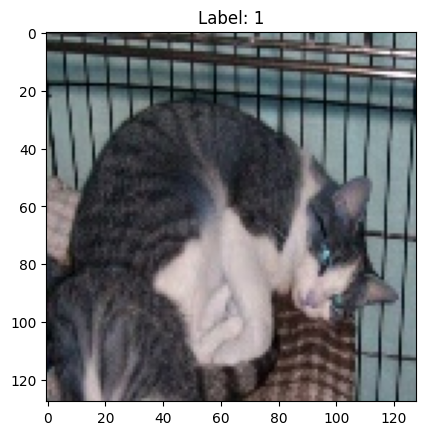

In [40]:
for image, label in train_parsed_dataset.take(5):
    print(f"Label: {label.numpy()}, Image shape: {image.shape}")
    plt.imshow(image)
    plt.title(f"Label: {label.numpy()}")
    plt.show()

    break


In [41]:
def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64)
    }
    parsed_example = tf.io.parse_single_example(example, feature_description)
    image = tf.io.decode_jpeg(parsed_example["image"])
    label = parsed_example["label"]
    return image, label

# Load and inspect TFRecord
train_tfrecord_comp_path="/content/tfrecords/train_comp.tfrecord"
train_raw_comp_dataset = tf.data.TFRecordDataset(train_tfrecord_comp_path,compression_type="GZIP")
train_parsed_comp_dataset = train_raw_comp_dataset.map(parse_tfrecord_fn)

for image, label in train_parsed_comp_dataset.take(5):
    print(f"Label: {label.numpy()}, Image shape: {image.shape}")


Label: 1, Image shape: (128, 128, 3)
Label: 1, Image shape: (128, 128, 3)
Label: 1, Image shape: (128, 128, 3)
Label: 1, Image shape: (128, 128, 3)
Label: 1, Image shape: (128, 128, 3)


In [68]:
# Paths
train_dataset_dir = "/content/train"
test_dataset_dir = "/content/test"  # Update with the root dataset path
train_dir = os.path.join(train_dataset_dir, "train")
test_dir = os.path.join(test_dataset_dir, "test")
output_dir = "/content/fruit_tfrecords"  # Update with the output directory
os.makedirs(output_dir, exist_ok=True)
train_fruit_tfrecord_path = os.path.join(output_dir, "train.tfrecord")
test_fruit_tfrecord_path = os.path.join(output_dir, "test.tfrecord")
 # Create output directory if it doesn't exist


In [65]:
test_dir

'/content/test/test'

In [45]:
class_names = sorted(os.listdir(train_dir))
{class_name: idx for idx, class_name in enumerate(class_names)}


{'Apple Braeburn': 0,
 'Apple Granny Smith': 1,
 'Apricot': 2,
 'Avocado': 3,
 'Banana': 4,
 'Blueberry': 5,
 'Cactus fruit': 6,
 'Cantaloupe': 7,
 'Cherry': 8,
 'Clementine': 9,
 'Corn': 10,
 'Cucumber Ripe': 11,
 'Grape Blue': 12,
 'Kiwi': 13,
 'Lemon': 14,
 'Limes': 15,
 'Mango': 16,
 'Onion White': 17,
 'Orange': 18,
 'Papaya': 19,
 'Passion Fruit': 20,
 'Peach': 21,
 'Pear': 22,
 'Pepper Green': 23,
 'Pepper Red': 24,
 'Pineapple': 25,
 'Plum': 26,
 'Pomegranate': 27,
 'Potato Red': 28,
 'Raspberry': 29,
 'Strawberry': 30,
 'Tomato': 31,
 'Watermelon': 32}

In [46]:
# Function to create TFRecord features
def _bytes_feature(value):
    """Returns a bytes_list from a string/byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from an int."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

# Function to create a class-to-label mapping
def get_class_label_map(data_dir):
    class_names = sorted(os.listdir(data_dir))  # Sort to ensure consistent labeling
    return {class_name: idx for idx, class_name in enumerate(class_names)}


In [69]:
import os
import tensorflow as tf
import cv2





# Function to process and write images and labels into TFRecord
def write_tfrecord(data_dir, output_path, class_label_map, image_size=(128, 128)):
    with tf.io.TFRecordWriter(output_path) as writer:
        for class_name, label in class_label_map.items():
            folder_path = os.path.join(data_dir, class_name)
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                # Read and resize the image
                image = cv2.imread(image_path)
                if image is None:
                    continue  # Skip unreadable files
                image = cv2.resize(image, image_size)
                image_bytes = tf.io.encode_jpeg(image).numpy()

                # Create a feature dictionary
                feature = {
                    "image": _bytes_feature(image_bytes),
                    "label": _int64_feature(label)
                }

                # Create an Example
                example = tf.train.Example(features=tf.train.Features(feature=feature))

                # Serialize and write to file
                writer.write(example.SerializeToString())
    print(f"TFRecord saved to: {output_path}")

# Create class-to-label mappings for train and test directories
train_class_label_map = get_class_label_map(train_dir)
test_class_label_map = get_class_label_map(test_dir)

# Write train and test TFRecords
write_tfrecord(train_dir, train_fruit_tfrecord_path, train_class_label_map)
#write_tfrecord(test_dir, test_tfrecord_path, test_class_label_map)



TFRecord saved to: /content/fruit_tfrecords/train.tfrecord


In [75]:
def testwrite_tfrecord(test_dir, output_path, image_size=(100, 100)):
    with tf.io.TFRecordWriter(output_path) as writer:
          for image_name in os.listdir(test_dir):
            folder_path=os.path.join(test_dir,image_name)

            image = cv2.imread(folder_path)
            if image is None:
              continue  # Skip unreadable files


            image = cv2.resize(image, (100,100))
            image_bytes = tf.io.encode_jpeg(image).numpy()
            feature={
                "image":_bytes_feature(image_bytes)
            }
            example=tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())
          print(f"TFRecord saved to: {output_path}")




In [76]:
testwrite_tfrecord(test_dir, test_tfrecord_path)

TFRecord saved to: /content/fruit_tfrecords/test.tfrecord


In [78]:
def parse_test_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
    }
    parsed_example = tf.io.parse_single_example(example, feature_description)
    image = tf.io.decode_jpeg(parsed_example["image"])

    return image

# Load and inspect TFRecord
test_tfrecord_path="/content/fruit_tfrecords/test.tfrecord"
test_raw_dataset = tf.data.TFRecordDataset(test_tfrecord_path)
test_parsed_dataset = test_raw_dataset.map(parse_test_tfrecord_fn)

for image, label in test_parsed_dataset.take(5):
    print(f" Image shape: {image.shape}")


 Image shape: (100, 100, 3)
 Image shape: (100, 100, 3)
 Image shape: (100, 100, 3)
 Image shape: (100, 100, 3)
 Image shape: (100, 100, 3)
